## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  LOG6308 - Systèmes de recommandations <br> </center>

## <center> TP1 -- Approches collaboratives : utilisateur-utilisateur, item-item, et agglomérative </center>

Le travail doit être fait en **équipe de deux**. 

## Identification de l'équipe: 02_eq28

### Groupe de laboratoire: 02

### Equipe numéro : 28

### Membres:

François Tourigny (2079718)

Gabriel Côté (2082508)

<br>

**Nature de la contribution:** Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. Soyez précis sur la contribution de chacun.

### Enoncé du TP

Ce notebook se trouve sous l'énoncé général du TP au lien [cours.polymtl.ca/MDesmarais/log6308/20251/Tp/tp1.html](https://cours.polymtl.ca/MDesmarais/log6308/20251/Tp/tp1.html).  Les données sont accessibles de ce lien.<br>

### Jeux de données

Vous avez 3 fichiers à votre disposition:

- 'Data/votes.csv': Matrice de données de 100 000 votes faits par 943 utilisateurs et portant sur 1682 items.
    - **user.id**: Indentifiant de l'utilisateur
    - **item.id**: Identifiant de l'item/film
    - **rating**: vote attribué à l'item par l'utilisateur
    - **timestamp**: Date d'enregistrement du vote (à ignorer pour ce TP) 
- 'Data/items.csv': Matrice de données sur les films
    - **movie.id**: Identifiant du film
    - **movie.title**: Nom du film
    - **release.date**: Date de sortie
    - **video.release.date**: Date de sortie de la video
    - **IMDb.URL**: Lien vers le film
    - les 19 autres champs sont les categories des films qui sont les suivantes:
        "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
- 'Data/u.csv': Matrice de données sur les utilisateurs
    - **id**: Identififiant de l'utilisateurs
    - **age**: Age de l'utilisateur
    - **gender**: Sexe de l'utilisateur
    - **job**: Emploi de l'utilisateur
    - **zip**: ZIP Code

Attention aux espaces et à la casse des differents champs. 

### Librairies permises

- numpy
- pandas
- seaborn
- matplotlib
- scipy


### Rédaction et remise du rapport

- Ce notebook constitue à la fois votre code et votre rapport. Il contient un squelette pour guider votre travail.

- Complétez directement le notebook, vous êtes libres de créer des nouvelles cellules de code ou de texte.

- <u>**IMPORTANT**</u> Remettez le ZIP contenant les données et le notebook sur Moodle avec le nom `MATRICULE1_MATRICULE2.ipynb` pour le notebook et `MATRICULE1_MATRICULE2.zip` pour le zip.


### CRITÈRES

- La démarche est valide et bien expliquée
- Les réponses sont correctes et commentées
- L'implémentation est performante et repose sur le calcul linéaire lorsqu'approprié
- La présentation est soignée et bien rédigée


### CODE D’HONNEUR

- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. Vous __ne pouvez pas__ soumettre un code écrit par quelqu’un d’autre.

- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe ou incorporer leur code dans votre TP.

- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.

## Question 1

### 1. Chargement des assets

#### 1.1. Chargement des librairies

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

#### 1.2. Chargement des données

Affichez tous les jeux de données

In [67]:
# TODO  --------------------------------- Préparation des Données ------------------------
## Chargement des votes
votes = pd.read_csv("data/ratings.csv")
# items 
items = pd.read_csv("data/items.csv")
# users
user = pd.read_csv("data/user.csv")
# End TODO

In [68]:
### TODO: Afficher les jeux de donnes
votes.head()
##End TODO

,user.id,item.id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [69]:
items.head()

,movie.id,movie.title,release.date,video.release.date,IMDb.URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
user.head()

,id,age,gender,job,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 1.3. Calcul de performances

On désire calculer les performances prédictives de quelques approches qui donnent une base de référence: le vote aléatoire, le vote moyen, le vote moyen utilisateur, le vote moyen item et finalement, le vote attendu (moyenne du vote moyen utilisateur et item). Puis rapporter l'erreur quadratique moyenne et l'erreur absolue moyenne (1) sans validation croisée et (2) avec validation croisée de 5 replis. Et enfin, déterminer si la différence entre l'erreur quadratique moyenne obtenue par le vote moyen item et le vote moyen utilisateur est statistiquement significative par un test d'hypothèse et en affichant les résultats visuellement. Pour cela, on procède en plusieurs étapes.


#### 1.3.1. Prétrairements
L’objectif ici est de créer une matrice utilisateurs-items qui, à chaque utilisateur, associe les votes qu’il a attribués aux films.

In [71]:
## Conversion du Pandas Datafram en Matrice Utilisateur Item : MUI
MUI = votes.pivot(index="user.id", columns="item.id", values="rating")
MUI.head()

item.id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user.id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
## Convertir le DF à une matrice numpy
MUI_numpy = MUI.to_numpy()
MUI_numpy_flat = MUI_numpy.reshape(-1)


### 1.3.2. Fonctions de calcul d'erreurs

Afin de calculer l'erreur quadratique moyenne et l'erreur absolue moyenne vous devez utiliser les fonctions ci-dessous. Completez leurs codes.

In [73]:
def RMSE_mat(y_pred, y_true):
    return np.sqrt(np.nanmean((y_pred - y_true) ** 2))

In [74]:
def MAE_mat(y_pred, y_true):
    return np.nanmean(np.abs(y_pred - y_true))

#### 1.3.3. Calcul des performances sans validation croisée

La validation croisée est une technique qui permet d'évaluer les performances d'un modèle/système sur de nouvelles données. Elle permet d'évaluer la capacité d'un modèle à généraliser la comprehension d’un problème. C’est-à-dire, à faire de bonnes prédictions sur des données qu’il n’a pas encore vues. Dans cet exercice, elle nous permet de savoir si l'approche employée permet de prédire correctement les votes attendues. Mais avant d'y arriver, dans cet exercice, afin de bien comprendre l'intérêt de cette technique, il est intéressant de commencer par une approche sans validation croisée (on utilise toutes les données).

Le code ci-dessous permet de calculer les prédictions de votes sans validation croisée. Complétez-le et commentez les résultats.

In [75]:
# TODO
## Vote aleatoire
def vote_aleatoire():
    return np.random.randint(6)

## Vote moyen
def vote_moyen(df):
    return np.nanmean(df)

## Vote moyen utilisateur
def vote_moyen_utilisateurs(df):
    return np.nanmean(df, axis=1)

## Vote moyen item
def vote_moyen_items(df):
    return np.nanmean(df, axis=0)

## Vote Moyen Attendu (Moyenne du vote moyen utilisateur et item)
def vote_moyen_attendu(df):
    return (vote_moyen_utilisateurs(df) + vote_moyen_items(df))/2


vote_aleatoire_pred = np.full(MUI_numpy.shape, vote_aleatoire())

votes_moyenne_pred   = np.full(MUI_numpy.shape, vote_moyen(MUI_numpy))

# Vote Moyen Utilisateur
# Prédiction des votes grâce à la moyenne des votes par utilisateur de la matrice d'entrainement
votes_moyenne_U_pred = np.tile(vote_moyen_utilisateurs(MUI_numpy)[:, np.newaxis], (1, MUI_numpy.shape[1]))

# Vote Moyen Utilisateur
# Prédiction des votes grâce à la moyenne des votes par item de la matrice d'entrainement
votes_moyenne_I_pred = np.tile(vote_moyen_items(MUI_numpy), (MUI_numpy.shape[0], 1))

# Vote Moyen Attendu (Moyenne du vote moyen utilisateur et item)
moyenne_U_repeat = np.tile(vote_moyen_utilisateurs(MUI_numpy)[:, np.newaxis], (1, MUI_numpy.shape[1]))
moyenne_I_repeat = np.tile(vote_moyen_items(MUI_numpy), (MUI_numpy.shape[0], 1))

votes_moyenne_A_pred = (moyenne_U_repeat + moyenne_I_repeat)/2

list_matrices_no_vote = [vote_aleatoire_pred, votes_moyenne_pred, votes_moyenne_U_pred, votes_moyenne_I_pred, votes_moyenne_A_pred]
list_RMSE_no_vote = []
list_MAE_no_vote = []

list_RMSE_no_vote.append(np.array([RMSE_mat(mat, MUI_numpy) for mat in list_matrices_no_vote]))
list_MAE_no_vote.append(np.array([MAE_mat(mat, MUI_numpy) for mat in list_matrices_no_vote]))

list_RMSE_no_vote = np.array(list_RMSE_no_vote)
list_MAE_no_vote = np.array(list_MAE_no_vote)

print("Résultats pour le vote aléatoire sur l'ensemble de test :")
print("RMSE: ", RMSE_mat(vote_aleatoire_pred, MUI_numpy))
print("MAE: ", MAE_mat(vote_aleatoire_pred, MUI_numpy),'\n')

print("Résultats pour le vote moyen sur l'ensemble de test :")
print("RMSE: ", RMSE_mat(votes_moyenne_pred, MUI_numpy))
print("MAE: ", MAE_mat(votes_moyenne_pred, MUI_numpy),'\n')

print("Résultats pour le vote moyen utilisateur sur l'ensemble de test :")
print("RMSE: ", RMSE_mat(votes_moyenne_U_pred, MUI_numpy))
print("MAE: ", MAE_mat(votes_moyenne_U_pred, MUI_numpy),'\n')

print("Résultats pour le vote moyen item sur l'ensemble de test :")
print("RMSE: ", RMSE_mat(votes_moyenne_I_pred, MUI_numpy))
print("MAE: ", MAE_mat(votes_moyenne_I_pred, MUI_numpy),'\n')

print("Résultats pour le vote moyen attendu sur l'ensemble de test :")
print("RMSE: ", RMSE_mat(votes_moyenne_A_pred, MUI_numpy))
print("MAE: ", MAE_mat(votes_moyenne_A_pred, MUI_numpy),'\n')


Résultats pour le vote aléatoire sur l'ensemble de test :
RMSE:  1.244138255982831
MAE:  1.00166 

Résultats pour le vote moyen sur l'ensemble de test :
RMSE:  1.1256679707622492
MAE:  0.9447000499999999 

Résultats pour le vote moyen utilisateur sur l'ensemble de test :
RMSE:  1.0308117943828063
MAE:  0.8262264099536629 

Résultats pour le vote moyen item sur l'ensemble de test :
RMSE:  1.0000700195275787
MAE:  0.7989582428029238 

Résultats pour le vote moyen attendu sur l'ensemble de test :
RMSE:  0.9668089878000198
MAE:  0.7825830601768504 



#### 1.3.4. Calcul des performances avec validation croisée

Les cellules ci-dessous contiennent le code pour faire la prediction de votes et le calcul des erreurs quadratiques moyennes et erreurs absolue moyenne. Completez le et commentez les resultats.

In [76]:
## Création des indices pour les valeurs différentes de np.nan
indices = np.arange(0, MUI_numpy.shape[0]*MUI_numpy.shape[1])
indices_na = indices[~np.isnan(MUI_numpy_flat)]

## Split Train Test des indices
nbre_replis = 5
np.random.shuffle(indices_na)

idx_split = np.split(indices_na, nbre_replis)

print(indices_na.shape)

(100000,)


In [77]:
## Je construis ma liste d'indice train et test
# Pour faire une cross validation à 5 replis il suffit de remplacer 0 par i
# et itérer de 0 à 4
list_RMSE = []
list_MAE = []

for i in range(nbre_replis):

    MUI_numpy_train_idx = np.concatenate(idx_split[:i] + idx_split[i+1:]) # Liste d'indices train
    MUI_numpy_test_idx = idx_split[i] # Liste d'indices test

    ## J'enlève les valeurs de test de la matrice d'entrainement, et vice versa
    MUI_numpy_train = np.copy(MUI_numpy)
    MUI_numpy_test = np.copy(MUI_numpy)
    
    row_train, col_train = zip(*[(idx//MUI_numpy.shape[1], idx%MUI_numpy.shape[1]) for idx in MUI_numpy_train_idx])
    row_test, col_test = zip(*[(idx//MUI_numpy.shape[1], idx%MUI_numpy.shape[1]) for idx in MUI_numpy_test_idx])

    
    #  Je redonne la structure de matrice aux ensembles de test et d'entrainement
    MUI_numpy_test[row_train, col_train] = np.nan
    MUI_numpy_train[row_test, col_test] = np.nan


    # On s'assure d'avoir les bonnes dimensions
    #print(MUI_numpy_train[~np.isnan(MUI_numpy_train)].shape)
    #print(MUI_numpy_test[~np.isnan(MUI_numpy_test)].shape)

    # Documentation pour np.nanmean : https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html
        
    # --------------------------------- Prédictions des Valeurs Test ---------------------------------
    # Prédiction des votes aléatoires entre 1 et 5 avec une distribution uniforme d'entiers
    votes_alea_pred      = np.full(MUI_numpy_test.shape, vote_aleatoire())

    # Vote Moyen
    # Prédiction des votes grâce à la moyenne des votes de la matrice d'entrainement
    votes_moyenne_pred   = np.full(MUI_numpy_test.shape, vote_moyen(MUI_numpy_train))

    # Vote Moyen Utilisateur
    # Prédiction des votes grâce à la moyenne des votes par utilisateur de la matrice d'entrainement
    votes_moyenne_U_pred = np.tile(vote_moyen_utilisateurs(MUI_numpy_train)[:, np.newaxis], (1, MUI_numpy_test.shape[1]))

    # Vote Moyen Utilisateur
    # Prédiction des votes grâce à la moyenne des votes par item de la matrice d'entrainement
    votes_moyenne_I_pred = np.tile(vote_moyen_items(MUI_numpy_train), (MUI_numpy_test.shape[0], 1))

    # Vote Moyen Attendu (Moyenne du vote moyen utilisateur et item)
    moyenne_U_repeat = np.tile(vote_moyen_utilisateurs(MUI_numpy_train)[:, np.newaxis], (1, MUI_numpy_test.shape[1]))
    moyenne_I_repeat = np.tile(vote_moyen_items(MUI_numpy_train), (MUI_numpy_test.shape[0], 1))

    votes_moyenne_A_pred = (moyenne_U_repeat + moyenne_I_repeat)/2

    # Calcul des RMSE
    list_matrices = [votes_alea_pred, votes_moyenne_pred, votes_moyenne_U_pred, votes_moyenne_I_pred, votes_moyenne_A_pred]

    list_RMSE.append(np.array([RMSE_mat(mat, MUI_numpy_test) for mat in list_matrices]))
    list_MAE.append(np.array([MAE_mat(mat, MUI_numpy_test) for mat in list_matrices]))

list_RMSE = np.array(list_RMSE)
list_MAE = np.array(list_MAE)

print("Résultats pour le vote aléatoire sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[0])
print("MAE: ", list_MAE.mean(axis=0)[0],'\n')

print("Résultats pour le vote moyen sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[1])
print("MAE: ", list_MAE.mean(axis=0)[1],'\n')

print("Résultats pour le vote moyen utilisateur sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[2])
print("MAE: ", list_MAE.mean(axis=0)[2],'\n')

print("Résultats pour le vote moyen item sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[3])
print("MAE: ", list_MAE.mean(axis=0)[3],'\n')

print("Résultats pour le vote moyen attendu sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[4])
print("MAE: ", list_MAE.mean(axis=0)[4],'\n')

/tmp/ipykernel_70898/3724767970.py:16: RuntimeWarning: Mean of empty slice
  return np.nanmean(df, axis=0)


Résultats pour le vote aléatoire sur l'ensemble de test :
RMSE:  1.6675860739293533
MAE:  1.3821800000000002 

Résultats pour le vote moyen sur l'ensemble de test :
RMSE:  1.125667048751579
MAE:  0.9447055360000001 

Résultats pour le vote moyen utilisateur sur l'ensemble de test :
RMSE:  1.0420735038196764
MAE:  0.8350548256274631 

Résultats pour le vote moyen item sur l'ensemble de test :
RMSE:  1.023328056577985
MAE:  0.8163486954910057 

Résultats pour le vote moyen attendu sur l'ensemble de test :
RMSE:  0.9821056739049301
MAE:  0.7945234571987742 



### 1.4. Analysez des resultats

On souhaite analyse et valider les resultats obtenus

#### 1.4.1. Analyse comparatives des resultats

Faites une analyse comparative des résultats  obtenus sans et avec la validation croisée. À quoi s'attendaient-t-on ? Qu'est-ce qu'on a obtenu? Pourquoi ?

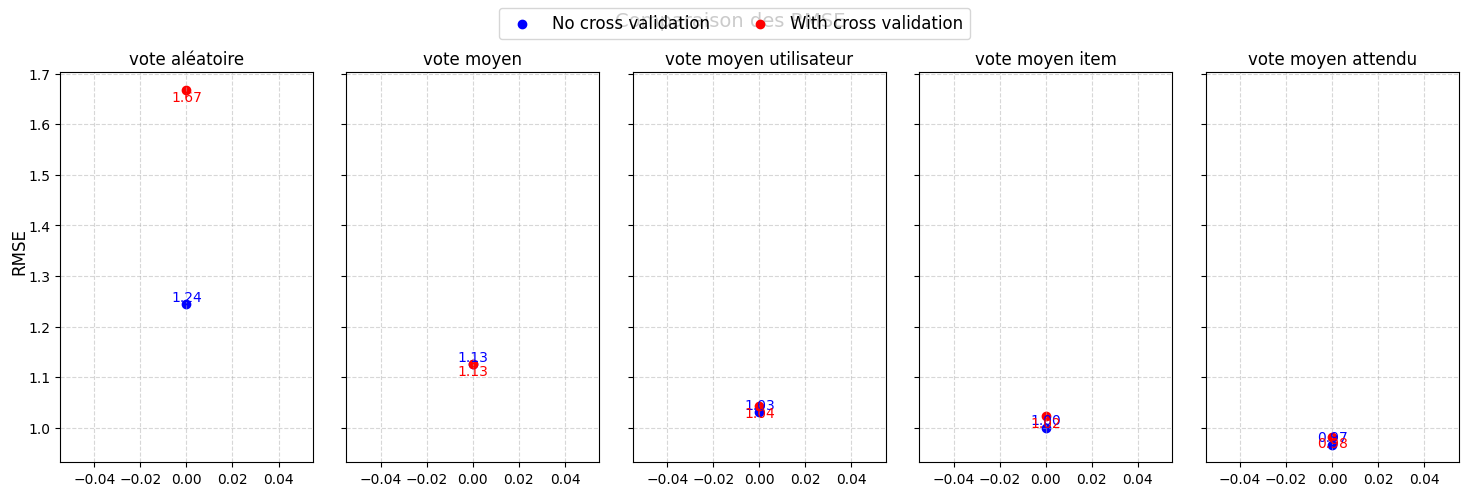

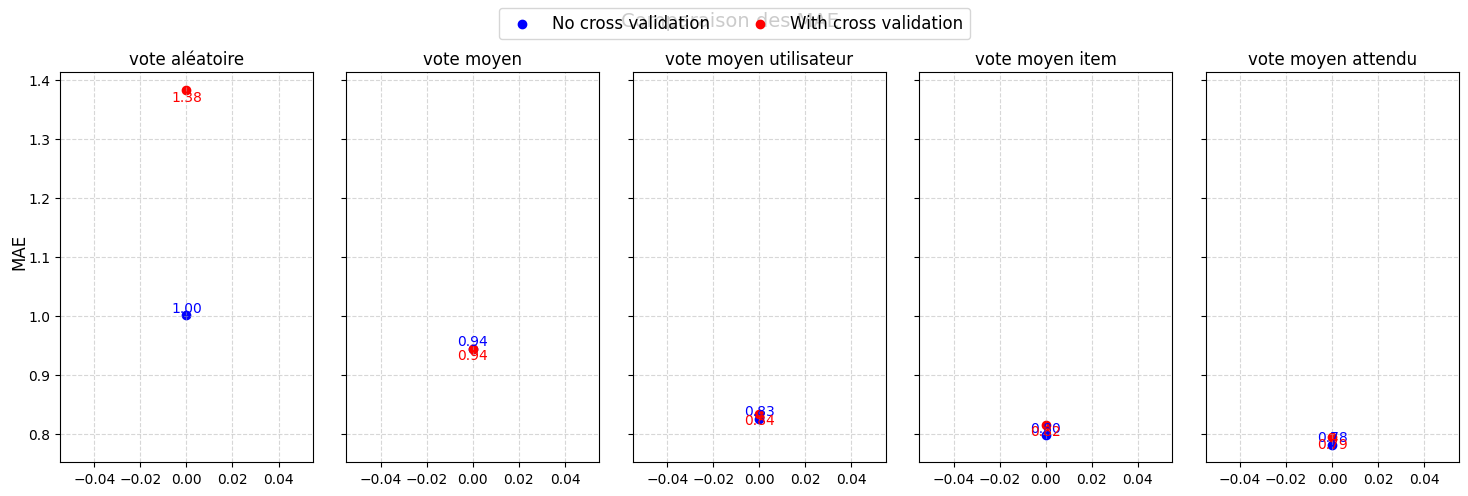

In [78]:
#TODO Analayse
test_names = ["vote aléatoire", "vote moyen", "vote moyen utilisateur", "vote moyen item", "vote moyen attendu"]

fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

for i in range(5):
    ax = axes[i]  # Select subplot
    rmse_no_vote = list_RMSE_no_vote[0][i]
    rmse_vote = list_RMSE.mean(axis=0)[i]
    
    # Plot points (stacked)
    ax.scatter(0, rmse_no_vote, color='b', marker='o') 
    ax.scatter(0, rmse_vote, color='r', marker='o') 
    
    # Label each point directly
    ax.text(0, rmse_no_vote, f"{rmse_no_vote:.2f}", ha='center', va='bottom', fontsize=10, color='b')
    ax.text(0, rmse_vote, f"{rmse_vote:.2f}", ha='center', va='top', fontsize=10, color='r')
    
    # Set title
    ax.set_title(test_names[i])
    ax.grid(True, linestyle="--", alpha=0.5)

fig.legend(["No cross validation", "With cross validation"], loc="upper center", ncol=2, fontsize=12)
fig.supylabel("RMSE")
fig.suptitle("Comparaison des RMSE", fontsize=14)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

for i in range(5):
    ax = axes[i]  # Select subplot
    rmse_no_vote = list_MAE_no_vote[0][i]
    rmse_vote = list_MAE.mean(axis=0)[i]
    
    # Plot points (stacked)
    ax.scatter(0, rmse_no_vote, color='b', marker='o') 
    ax.scatter(0, rmse_vote, color='r', marker='o') 
    
    # Label each point directly
    ax.text(0, rmse_no_vote, f"{rmse_no_vote:.2f}", ha='center', va='bottom', fontsize=10, color='b')
    ax.text(0, rmse_vote, f"{rmse_vote:.2f}", ha='center', va='top', fontsize=10, color='r')
    
    # Set title
    ax.set_title(test_names[i])
    ax.grid(True, linestyle="--", alpha=0.5)

fig.legend(["No cross validation", "With cross validation"], loc="upper center", ncol=2, fontsize=12)
fig.supylabel("MAE")
fig.suptitle("Comparaison des MAE", fontsize=14)

plt.tight_layout()
plt.show()

On voit ici dans les deux comparaison entre les valeurs RMSE des différentes approches avec sans validation croisée que les valeurs sont très similaires à l'exception du vote aléatoire. Dans le MAE, on voit un phénomène similaire, les valeurs entre la valide croisée et sans validation croisée. On remarque que seul le vote aléatoire est significativement différent alors que pour toutes les autres approches, les résultats de MAE sont très comparable entre avec et sans validation croisée.

#### 1.4.2. Test d'hypothèse
On souhaites déterminer si la différence entre l'erreur quadratique moyenne obtenue par le vote moyen item et le vote moyen utilisateur est statistiquement significative. Faites un test d'hypothèse à cet fin.

In [79]:
# TODO
## t-Test:
test_names = ["vote aléatoire", "vote moyen", "vote moyen utilisateur", "vote moyen item", "vote moyen attendu"]

for i in range(len(list_matrices)):
    t_stat_rmse, p_value_rmse = sp.stats.ttest_ind(list_matrices_no_vote[1].flatten(), list_matrices[1].flatten())
    t_stat_mae, p_value_mae = sp.stats.ttest_ind(list_MAE_no_vote[0], list_MAE[0])
    if p_value_rmse < 0.05:
        print("For ", test_names[i],"there is significant RMSE difference (p < 0.05)")
    else:
        print("For ", test_names[i],"there is no significant RMSE difference (p ≥ 0.05)")

    if p_value_mae < 0.05:
        print("For ", test_names[i],"there is significant MAE difference (p < 0.05)")
    else:
        print("For ", test_names[i],"there is no significant MAE difference (p ≥ 0.05)")
    print()

# End TODO

For  vote aléatoire there is significant RMSE difference (p < 0.05)
For  vote aléatoire there is no significant MAE difference (p ≥ 0.05)

For  vote moyen there is significant RMSE difference (p < 0.05)
For  vote moyen there is no significant MAE difference (p ≥ 0.05)

For  vote moyen utilisateur there is significant RMSE difference (p < 0.05)
For  vote moyen utilisateur there is no significant MAE difference (p ≥ 0.05)

For  vote moyen item there is significant RMSE difference (p < 0.05)
For  vote moyen item there is no significant MAE difference (p ≥ 0.05)

For  vote moyen attendu there is significant RMSE difference (p < 0.05)
For  vote moyen attendu there is no significant MAE difference (p ≥ 0.05)



/home/tourtour/poly/log6308/env_lab/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Nous ne pensons pas avoir compris ce qui était attendu au niveau des comparaisons et des tests significatifs. Nous avons donc essayé de faire le t-test entre les valeurs de matrices estimées avec et sans la validation croisée.

## Question 2 - Filtres Collaboratifs

On désire calculer les erreurs des prédictions des approches de filtres collaboratifs item-item et utilisateur-utilisateur. Pour cela, on se propose d'utiliser les fonctions ci-dessous qui permettent de:
 - Calculer la similarité cosinus entre deux vecteurs/matrices ;
 - Predire les votes par l'approche filtrage collaboratifs .

Completez les!

In [80]:
## Similarité Cosinus entre les vecteurs ligne de la matrice A
#  et les vecteurs ligne de la matrice B
def cosinus_matrices(A, B):
    A = A.copy()
    B = B.copy()

    # Remplace les nan par 0, pour ne pas rajouter + de NAN après le produit matriciel
    A = np.nan_to_num(A, nan=0.0)
    B = np.nan_to_num(B, nan=0.0)

    # Matrice colonne des normes de chacuns des vecteurs de A
    col_norm_A = np.linalg.norm(A, axis=1, keepdims=True)

    # Matrice ligne des normes de chacuns des vecteurs de B
    col_norm_B = np.linalg.norm(B, axis=1, keepdims=True).T 

    dot_product = np.dot(A, B.T)
    norm_product = col_norm_A * col_norm_B
    cos_similarity = dot_product / norm_product
    cos_similarity = np.nan_to_num(cos_similarity, nan=0.0)
    cos_similarity[cos_similarity == 1] = 0

    return cos_similarity

In [81]:
def filtre_collaboratif(V, W):

    # Crée une matrice booléenne de la même taille que V. Les éléments qui ne sont pas NaN dans V 
    # (c'est-à-dire les éléments pour lesquels une note existe) sont marqués par 1, et les NaN par 0. 
    # Cette matrice sera utilisée pour s'assurer que seules les notes existantes contribuent aux prédictions.
    Bool_m = (~np.isnan(V))*1 
    #print(Bool_m)

    V = V.copy()
    W = W.copy()
    V_moy = vote_moyen_utilisateurs(V)

    # Les valeurs NaN dans V et W sont remplacées par 0. Cela permet d'effectuer des opérations matricielles numpy sans erreur.
    V = np.nan_to_num(V, nan=0.0)
    W = np.nan_to_num(W, nan=0.0)

    # Calcule la somme des similarités absolues pour chaque utilisateur, mais seulement pour les items qu'ils ont notés (grâce à Bool_m). 
    K = 1 / np.sum(np.abs(W), axis=0)
    # print(np.sum(np.abs(W), axis=0))
    # print(f"K  : {K}")

    # Calcule les notes prédites. 
    #print(f"V  : {V}")
    #print(f"V_moy  : {V_moy}")
    V_res = V - V_moy[:, np.newaxis]
    #print(f"V_res  : {V_res}")
    n_rows, n_columns = V.shape

    V_pred = V.copy()

    for a in range(n_rows):
        for j in range(n_columns):
            # print(W[a].shape)
            # print(V_res[:, j].shape)
            V_pred[a, j] = V_moy[a] + K[a] * np.sum(W[a] * V_res[:, j])

    return V_pred

Maintenant, pour le calcul des differents erreur, procédez par étapes et rapportez, à chaque étape, l'erreur quadratique moyenne et l'erreur absolue moyenne à partir de la matrice de prédiction obtenue à l'aide de la matrice cosinus de similarité.

M_pred = MUI x M_cos

## 2 -a) Prédiction avec tous les utilisateurs/items 

Prediction (sans voisins rapprochés) et sans correction pour biais utilisateur/item (sans normaliser en soustrayant la moyenne utilisateur/item)

Ici ce que l'on fait c'est d'utiliser les méthodes que l'on a créé plus tôt de filtre collaboratif et de matrice cosinus pour obtenir nos prédictions. La fonction filtre_collaboratif est faite pour fonctionner selon la méthode utilisateur-utilisateur, mais si on transpose la matrice avant de la passer aux fonctions on obtient la méthode item-item

In [82]:
# TODO
## Approche Utilisateur
# MUI_filled = np.nan_to_num(MUI_numpy, nan=0.0)
M_cosU = cosinus_matrices(MUI_numpy, MUI_numpy)
MUI_U_pred = filtre_collaboratif(MUI_numpy, M_cosU)
# print(MUI_numpy)
# print(MUI_U_pred)

#End TODO

In [83]:
rmse_U = RMSE_mat(MUI_U_pred, MUI_numpy)
mae_U = MAE_mat(MUI_U_pred, MUI_numpy)
print("RMSE: ", rmse_U)
print("MAE: ", mae_U,'\n')

RMSE:  2.8415746545224034
MAE:  2.644070673064344 



In [84]:
# TODO

## Approche Item
M_cosI = cosinus_matrices(MUI_numpy.T, MUI_numpy.T)
MUI_I_pred = filtre_collaboratif(MUI_numpy.T, M_cosI).T

#End TODO

In [85]:
rmse_I = RMSE_mat(MUI_I_pred, MUI_numpy)
mae_I = MAE_mat(MUI_I_pred, MUI_numpy)
print("RMSE: ", rmse_I)
print("MAE: ", mae_I,'\n')

RMSE:  2.723698104623824
MAE:  2.5087321588862266 



Ici, on obtient des résultats assez mauvais, mais c'est normal puisqu'on a aucune technique de voisinage et on fait sans biais. On a donc des valeurs plus loin de la réalité. Même raisonnement pour U-U et I-I

## 2 -b) Correction pour biais utilisateur/item. 

Vous pouvez prendre l'ensemble des les valeurs observées dans le calcul des moyennes items et utilisateurs (des précisions sur ce point seront données en classe — voir aussi le bonus)


> Ici le biais utilisé est le Vote moyen.  
Attention (Moyenne du vote moyen utilisateur et item)

In [86]:
#TODO

## Calcul de la moyenne attendue
votes_moyenne_U_pred = vote_moyen_utilisateurs(MUI_numpy)
#print(votes_moyenne_U_pred)

# Vote Moyen Utilisateur
votes_moyenne_I_pred = vote_moyen_items(MUI_numpy)

# # Vote Moyen Attendu (Moyenne du vote moyen utilisateur et item)
moyenne_U_repeat = np.tile(vote_moyen_utilisateurs(MUI_numpy)[:, np.newaxis], (1, MUI_numpy.shape[1]))
moyenne_I_repeat = np.tile(vote_moyen_items(MUI_numpy), (MUI_numpy.shape[0], 1))

# # Notre Baseline
R_moy = (moyenne_U_repeat + moyenne_I_repeat) / 2

#print(R_moy)
rmse = RMSE_mat(R_moy, MUI_numpy)
mae = MAE_mat(R_moy, MUI_numpy)
print("RMSE: ", rmse)
print("MAE: ", mae,'\n')

#End TODO

RMSE:  0.9668089878000198
MAE:  0.7825830601768504 



NB : Il est possible d'utiliser la matrice de vote moyen utilisateur ou item au lieu d'utiliser le vote attendu. Néanmoins le vote attendu donne de meilleurs résultats.

Pour les méthodes suivantes, ce que l'on a compris de ce qui était demandé c'était de prendre le biais (utilisateur dans ce cas-ci, item dans le prochain cas) et de le soustraire à notre matrice utilisateur-item de base. Le biais ici est la valeur moyenne_U_repeat, car c'est le biais par utilisateur répété sur toutes les colonnes pour avoir la matrice complète. Ensuite on recalcule notre similarité cosinus, on repasse le tout dans notre filtre collaboratif et on finit par réajouter le biais pour avoir des valeurs sensées. 

In [87]:
#TODO : Approche Utilisateur
## Calculer la matrice de vote Item-Item sans biais


MUI_WB_U_U = MUI_numpy - moyenne_U_repeat

#Code
cos_U_WB = cosinus_matrices(MUI_WB_U_U, MUI_WB_U_U )
M_pred_U_WB = filtre_collaboratif(MUI_WB_U_U, cos_U_WB)

M_final = M_pred_U_WB + moyenne_U_repeat

rmse_corrected = RMSE_mat(M_final, MUI_numpy)
mae_corrected = MAE_mat(M_final, MUI_numpy)

print("Avec correction des biais - RMSE:", rmse_corrected)
print("Avec correction des biais - MAE:", mae_corrected)


#End TODO

Avec correction des biais - RMSE: 0.9445045441591039
Avec correction des biais - MAE: 0.7496254141527522


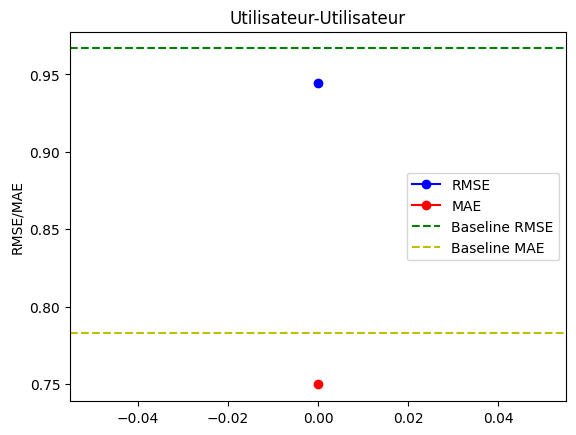

In [88]:
# RMSE pour U-U
plt.subplot(1, 1, 1)
plt.plot(rmse_corrected, label='RMSE', marker='o', color='b')
plt.plot(mae_corrected, label='MAE', marker='o', color='r')
plt.axhline(y=rmse, color='g', linestyle='--', label='Baseline RMSE')
plt.axhline(y=mae, color='y', linestyle='--', label='Baseline MAE')
plt.ylabel('RMSE/MAE')
plt.title('Utilisateur-Utilisateur')
plt.legend()

Comme on peut le voir, ici on bat notre baseline par la méthode d'ajout de biais

In [89]:
#TODO : Approche Item
## Calculer la matrice de vote Item-Item sans biais


MUI_WB_I_I = MUI_numpy - moyenne_I_repeat

#Code
cos_I_WB = cosinus_matrices(MUI_WB_I_I.T, MUI_WB_I_I.T )
M_pred_I_WB = filtre_collaboratif(MUI_WB_I_I.T, cos_I_WB).T

M_final = M_pred_I_WB + moyenne_I_repeat

rmse_corrected = RMSE_mat(M_final, MUI_numpy)
mae_corrected = MAE_mat(M_final, MUI_numpy)

print("Avec correction des biais - RMSE:", rmse_corrected)
print("Avec correction des biais - MAE:", mae_corrected)


#End TODO

/tmp/ipykernel_70898/3753985323.py:19: RuntimeWarning: invalid value encountered in divide
  cos_similarity = dot_product / norm_product
/tmp/ipykernel_70898/1895654846.py:18: RuntimeWarning: divide by zero encountered in divide
  K = 1 / np.sum(np.abs(W), axis=0)
/tmp/ipykernel_70898/1895654846.py:35: RuntimeWarning: invalid value encountered in scalar multiply
  V_pred[a, j] = V_moy[a] + K[a] * np.sum(W[a] * V_res[:, j])


Avec correction des biais - RMSE: 0.925892427686442
Avec correction des biais - MAE: 0.7393201736566887


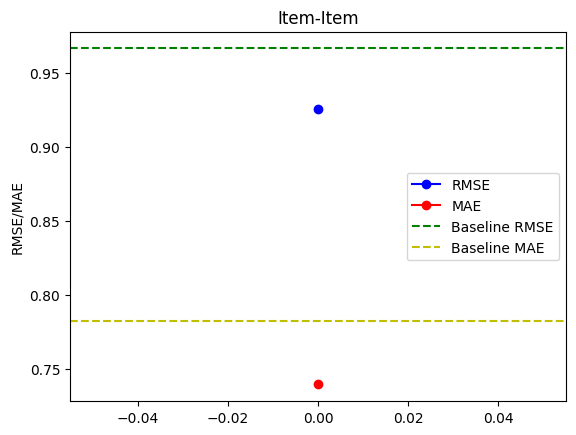

In [90]:
# RMSE pour I-I
plt.subplot(1, 1, 1)
plt.plot(rmse_corrected, label='RMSE', marker='o', color='b')
plt.plot(mae_corrected, label='MAE', marker='o', color='r')
plt.axhline(y=rmse, color='g', linestyle='--', label='Baseline RMSE')
plt.axhline(y=mae, color='y', linestyle='--', label='Baseline MAE')
plt.ylabel('RMSE/MAE')
plt.title('Item-Item')
plt.legend()

Comme on le voit dans le graphique, maintenant qu'on utilise le biais, on bat notre baseline

## 2 -c) Ajout de voisins rapprochés

Avec k=100 voisins rapprochés

Ici, on redéfinit la fonction de filtre collaboratif pour n'utiliser que les k voisins les plus proches selon la matrice de similarité cosinus

In [91]:
import numpy as np

def filtre_collaboratif_k_voisins(V, W, k=10):
    """
    Implémente le filtrage collaboratif basé sur l'approche utilisateur-utilisateur (U-U)
    en utilisant uniquement les k plus proches voisins pour la prédiction.
    
    Args:
        V (numpy.ndarray): Matrice des votes (utilisateurs x items)
        W (numpy.ndarray): Matrice de similarité utilisateur-utilisateur
        k (int): Nombre de voisins à prendre en compte

    Returns:
        numpy.ndarray: Matrice des votes prédits
    """
    
    # Crée une matrice booléenne indiquant les votes existants
    Bool_m = (~np.isnan(V)) * 1 

    V = V.copy()
    W = W.copy()
    
    # Calcule la moyenne des votes par utilisateur
    V_moy = vote_moyen_utilisateurs(V)  # moyenne par utilisateur (lignes)
    
    # Remplace les NaN par 0 pour éviter les erreurs dans les calculs matriciels
    V = np.nan_to_num(V, nan=0.0)
    W = np.nan_to_num(W, nan=0.0)

    # Nombre d'utilisateurs et d'items
    n_rows, n_columns = V.shape

    # Initialisation de la matrice des prédictions
    V_pred = V.copy()

    # Parcours des utilisateurs pour calculer leurs prédictions
    for a in range(n_rows):
        # Indices des k plus proches voisins (triés par similarité décroissante)
        voisins_k = np.argsort(-np.abs(W[a]))[1:k+1]  # [1:k+1] pour exclure a lui-même

        # Normalisation : somme des similarités absolues des voisins k
        K_a = 1 / np.sum(np.abs(W[a, voisins_k]) + 1e-8)  # Évite division par zéro
        
        for j in range(n_columns):
            # Prédiction basée uniquement sur les k voisins
            V_pred[a, j] = V_moy[a] + K_a * np.sum(W[a, voisins_k] * (V[voisins_k, j] - V_moy[voisins_k]))

    return V_pred


Ensuite, on répond à la question et au bonus 1 en calculant les prédictions pour les voisins les plus proches de k=10 à k=100, puis on fait un graphique. On garde aussi la logique de biais de la section précédente pour faire nos prédictions.

In [92]:
## Approche Utilisateur
rmse_UU_values = []
mae_UU_values = []
k_values = range(10, 101, 10)

M_cos_WB_UU = cosinus_matrices(MUI_WB_U_U, MUI_WB_U_U)
for n_voisins in k_values:
    M_pred_k_UU = filtre_collaboratif_k_voisins(MUI_WB_U_U, M_cos_WB_UU, n_voisins)
    M_final_k_UU = M_pred_k_UU + moyenne_U_repeat

    rmse_UU = RMSE_mat(M_final_k_UU, MUI_numpy)
    mae_UU = MAE_mat(M_final_k_UU, MUI_numpy)

    rmse_UU_values.append(rmse_UU)
    mae_UU_values.append(mae_UU)

    print(f"Approche Utilisateur (k={n_voisins}) :\nRMSE: {rmse_UU}\nMAE: {mae_UU}")


Approche Utilisateur (k=10) :
RMSE: 0.8882439179305199
MAE: 0.6982925647849316
Approche Utilisateur (k=20) :
RMSE: 0.8913256636441519
MAE: 0.7010276834202411
Approche Utilisateur (k=30) :
RMSE: 0.8958929294634597
MAE: 0.7047725172577262
Approche Utilisateur (k=40) :
RMSE: 0.9001194408525941
MAE: 0.7084494787501376
Approche Utilisateur (k=50) :
RMSE: 0.9039003857201601
MAE: 0.7115841659256289
Approche Utilisateur (k=60) :
RMSE: 0.9072713002803267
MAE: 0.7145817713893
Approche Utilisateur (k=70) :
RMSE: 0.9101800722829506
MAE: 0.7171058503633864
Approche Utilisateur (k=80) :
RMSE: 0.9128409875347928
MAE: 0.7194030029972805
Approche Utilisateur (k=90) :
RMSE: 0.9152386204368786
MAE: 0.7215162260919483
Approche Utilisateur (k=100) :
RMSE: 0.9174508502771223
MAE: 0.7234291796579008


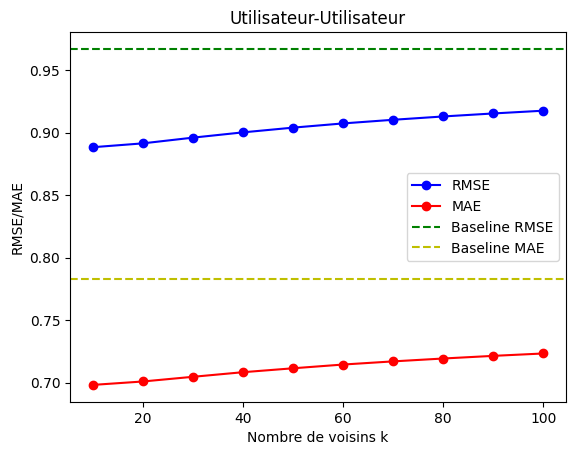

In [93]:
# RMSE pour U-U
plt.subplot(1, 1, 1)
plt.plot(k_values, rmse_UU_values, label='RMSE', marker='o', color='b')
plt.plot(k_values, mae_UU_values, label='MAE', marker='o', color='r')
plt.axhline(y=rmse, color='g', linestyle='--', label='Baseline RMSE')
plt.axhline(y=mae, color='y', linestyle='--', label='Baseline MAE')
plt.xlabel('Nombre de voisins k')
plt.ylabel('RMSE/MAE')
plt.title('Utilisateur-Utilisateur')
plt.legend()

Comme on peut le constater, plus notre nombre de voisins est grand plus on a un mauvais RMSE et MAE. C'est parce que plus on augmente le nombre de voisins, plus ils sont différents de notre utilisateur, alors on perds un peu de précision dans nos prédictions car on se fie à des utilisateurs moins similaires. On voit aussi qu'on a battu notre baseline sur tous nos essaies dans le graphe.

Ici, on refait la même chose pour l'approche Item-Item

In [94]:
## Approche Item
rmse_II_values = []
mae_II_values = []
k_values = range(10, 101, 10)

M_cos_WB_II = cosinus_matrices(MUI_WB_I_I.T, MUI_WB_I_I.T)
for n_voisins in k_values:
    M_pred_k_II = filtre_collaboratif_k_voisins(MUI_WB_I_I.T, M_cos_WB_II, n_voisins).T
    M_final_k_II = M_pred_k_II + moyenne_I_repeat

    rmse_II = RMSE_mat(M_final_k_II, MUI_numpy)
    mae_II = MAE_mat(M_final_k_II, MUI_numpy)

    rmse_II_values.append(rmse_II)
    mae_II_values.append(mae_II)

    print(f"Approche Utilisateur (k={n_voisins}) :\nRMSE: {rmse_II}\nMAE: {mae_II}")

/tmp/ipykernel_70898/3753985323.py:19: RuntimeWarning: invalid value encountered in divide
  cos_similarity = dot_product / norm_product


Approche Utilisateur (k=10) :
RMSE: 0.8652427089441067
MAE: 0.6874086443359931
Approche Utilisateur (k=20) :
RMSE: 0.8714516771438561
MAE: 0.6935570008162306
Approche Utilisateur (k=30) :
RMSE: 0.8768688124635178
MAE: 0.6981603599656333
Approche Utilisateur (k=40) :
RMSE: 0.8815935847929082
MAE: 0.7020413835128481
Approche Utilisateur (k=50) :
RMSE: 0.8856254478063318
MAE: 0.7054115070970799
Approche Utilisateur (k=60) :
RMSE: 0.8888249707239608
MAE: 0.7080194656754094
Approche Utilisateur (k=70) :
RMSE: 0.8914386097929294
MAE: 0.7101605185815457
Approche Utilisateur (k=80) :
RMSE: 0.8936287029126324
MAE: 0.7119290639515908
Approche Utilisateur (k=90) :
RMSE: 0.895620199128704
MAE: 0.7135398740027236
Approche Utilisateur (k=100) :
RMSE: 0.8974390768307904
MAE: 0.7150057569797925


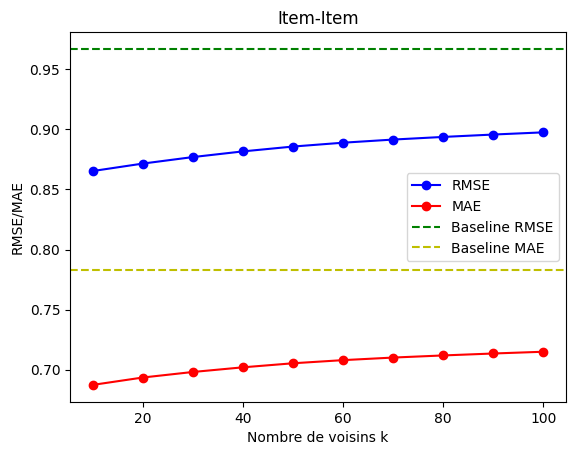

In [95]:
# RMSE pour I-I
plt.subplot(1, 1, 1)
plt.plot(k_values, rmse_II_values, label='RMSE', marker='o', color='b')
plt.plot(k_values, mae_II_values, label='MAE', marker='o', color='r')
plt.axhline(y=rmse, color='g', linestyle='--', label='Baseline RMSE')
plt.axhline(y=mae, color='y', linestyle='--', label='Baseline MAE')
plt.xlabel('Nombre de voisins k')
plt.ylabel('RMSE/MAE')
plt.title('Item-Item')
plt.legend()

Comme on peut voir sur le graphe, la même chose se produit qu'à la méthode Utilisateur-Utilisateur. Plus on a de voisins, moins ceux-ci sont similaires et on perd donc de la précision. Nous avons quand même amélioré le RMSE et le MAE selon notre baseline, comme on peut le voir avec les lignes dans le graphe 